<a href="https://colab.research.google.com/github/Tasniyaa/ML-Assignment/blob/main/AI_LabFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
from zipfile import ZipFile
with ZipFile ('/content/drive/MyDrive/bank-data.zip', 'r') as zipOBJ:
  zipOBJ.extractall('AI_Dataset')

In [45]:
data_path = '/content/AI_Dataset/bank-data/bank-full.csv'

In [47]:
df = pd.read_csv(data_path, delimiter=';')
to_drop = ['day', 'month']
df = df.drop(columns=to_drop)
Y = df['y']
Y = Y
data = df.drop('y', axis=1)

data

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown


In [48]:
#replacing categorical features with numerical value

#job 
for index, item in enumerate(data['job']):
  if str(item) == 'unknown':
    data['job'][index] = 0
  elif str(item) == 'admin.':
    data['job'][index] = 1
  elif str(item) == 'retired':
    data['job'][index] = 2
  elif str(item) == 'unemployed':
    data['job'][index] = 3
  elif str(item) == 'management':
    data['job'][index] = 4
  elif str(item) == 'blue-collar':
    data['job'][index] = 5
  elif str(item) == 'technician':
    data['job'][index] = 6
  elif str(item) == 'services':
    data['job'][index] = 7
  elif str(item) == 'student':
    data['job'][index] = 8
  elif str(item) == 'housemaid':
    data['job'][index] = 9
  elif str(item) == 'entrepreneur':
    data['job'][index] = 10
  elif str(item) == 'self-employed':
    data['job'][index] = 11

#marital
for index, item in enumerate(data['marital']):
  if str(item) == 'single':
    data['marital'][index] = 0
  elif str(item) == 'married':
    data['marital'][index] = 1
  elif str(item) == 'divorced':
    data['marital'][index] = 2

# education 
for index, item in enumerate(data['education']):
  if str(item) == 'unknown':
    data['education'][index] = 0
  elif str(item) == 'primary':
    data['education'][index] = 1
  elif str(item) == 'secondary':
    data['education'][index] = 2
  elif str(item) == 'tertiary':
    data['education'][index] = 3

# default
for index, item in enumerate(data['default']):
  if str(item) == 'no':
    data['default'][index] = -1
  else:
    data['default'][index] = 1

# housing
for index, item in enumerate(data['housing']):
  if str(item) == 'no':
    data['housing'][index] = -1
  else:
    data['housing'][index] = 1

# loan
for index, item in enumerate(data['loan']):
  if str(item) == 'no':
    data['loan'][index] = -1
  else:
    data['loan'][index] = 1

#contact
for index, item in enumerate(data['contact']):
  if str(item) == 'unknown':
    data['contact'][index] = 0
  elif str(item) == 'cellular':
    data['contact'][index] = 1
  elif str(item) == 'telephone':
    data['contact'][index] = 2

# poutcome
for index, item in enumerate(data['poutcome']):
  if str(item) == 'unknown':
    data['poutcome'][index] = 0
  elif str(item) == 'success':
    data['poutcome'][index] = 1
  elif str(item) == 'other':
    data['poutcome'][index] = 2
  elif str(item) == 'failure':
    data['poutcome'][index] = 3

# Y
for index, item in enumerate(Y):
  if str(item) == 'no':
    Y[index] = -1
  else:
    Y[index] = 1
Y = Y.astype('int')

<ipython-input-48-307ad56c8ab7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['job'][index] = 4
<ipython-input-48-307ad56c8ab7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['job'][index] = 6
<ipython-input-48-307ad56c8ab7>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['job'][index] = 10
<ipython-input-48-307ad56c8ab7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [49]:
data = (data -np.min(data))/(np.max(data)-np.min(data)).values
data

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,0.519481,0.363636,0.5,1.0,0.0,0.092259,1.0,0.0,0.0,0.05307,0.0,0.0,0.0,0.0
1,0.337662,0.545455,0.0,0.666667,0.0,0.073067,1.0,0.0,0.0,0.030704,0.0,0.0,0.0,0.0
2,0.194805,0.909091,0.5,0.666667,0.0,0.072822,1.0,1.0,0.0,0.015453,0.0,0.0,0.0,0.0
3,0.376623,0.454545,0.5,0.0,0.0,0.086476,1.0,0.0,0.0,0.018707,0.0,0.0,0.0,0.0
4,0.194805,0.0,0.0,0.0,0.0,0.072812,0.0,0.0,0.0,0.04026,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.545455,0.5,1.0,0.0,0.080293,0.0,0.0,0.5,0.198658,0.032258,0.0,0.0,0.0
45207,0.688312,0.181818,1.0,0.333333,0.0,0.088501,0.0,0.0,0.5,0.092721,0.016129,0.0,0.0,0.0
45208,0.701299,0.181818,0.5,0.666667,0.0,0.124689,0.0,0.0,0.5,0.229158,0.064516,0.212156,0.010909,0.333333
45209,0.506494,0.454545,0.5,0.666667,0.0,0.078868,0.0,0.0,1.0,0.103294,0.048387,0.0,0.0,0.0


In [50]:
x_train, x_test, y_train, y_test = train_test_split(data, Y, test_size = 0.2, random_state = 42)

In [51]:
classifier = svm.SVC(kernel='sigmoid')
classifier = classifier.fit(x_train, y_train)

In [53]:
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) * 100.0
print("Accuracy : ",accuracy)

Accuracy :  78.77916620590511


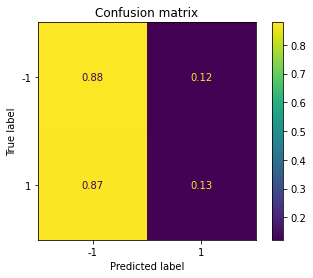

In [56]:
matrix = ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test, normalize='true')
plt.title('Confusion matrix')
plt.show(matrix)
plt.show()
